In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
import plotly.express as px

In [2]:
df_ped = pd.read_csv('/Users/sabas/Downloads/AI Studio Fall 2024 (Pfizer)/Weekly_Cumulative_Influenza_Vaccination_Coverage__Children_6_months_through_17_years__United_States_20240826.csv')

In [3]:
df_adult = pd.read_csv('/Users/sabas/Downloads/AI Studio Fall 2024 (Pfizer)/Weekly_Cumulative_Influenza_Vaccination_Coverage__Adults_18_and_Older__United_States_20240826.csv')

In [4]:
df_ped.columns.sort_values()
df_adult.columns.sort_values()

Index(['95 CI (%)', 'CI_Half_width_95pct', 'Current_Season_Week_Ending',
       'Demographic_Level', 'Demographic_Level_Sort', 'Demographic_Name',
       'Demographic_Name_Sort', 'Geographic_Level', 'Geographic_Name',
       'Geographic_Sort', 'Indicator_Category_Label',
       'Indicator_Category_Label_Sort', 'Indicator_Label', 'Influenza_Season',
       'Legend', 'Legend_Sort', 'Month_Week', 'ND_Weekly_Estimate',
       'Season_Sort', 'Suppression_Flag', 'Week_Ending', 'n_unweighted'],
      dtype='object')

In [5]:
df_ped.rename(columns={
        'CI_HalfWidth': 'CI_Half_width_95pct',
        'Current_Season_Week_Ending_Label': 'Current_Season_Week_Ending',
        'Demographic_Level_Sort_Order': 'Demographic_Level_Sort',
        'Demographic_Name_Sort_Order': 'Demographic_Name_Sort',
        'Geography_Level': 'Geographic_Level',
        'Geography_Name': 'Geographic_Name',
        'geography_level_sort_order': 'Geographic_Sort',
        'Indicator Category Label': 'Indicator_Category_Label',
        'Legend_Label': 'Legend',
        'Point_Estimate': 'ND_Weekly_Estimate'
        }, inplace=True)
        
df = pd.concat([df_adult,df_ped],ignore_index=True)

In [6]:
df.head()

,Geographic_Level,Geographic_Name,Demographic_Level,Demographic_Name,Indicator_Label,Indicator_Category_Label,Month_Week,Week_Ending,ND_Weekly_Estimate,CI_Half_width_95pct,...,Legend,95 CI (%),Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
0,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,30.8,7.8784,...,"2023-2024, Arizona, Overall (18+ years)",22.9 - 38.7,4.0,1,1,14,3,3140101,NaN,NaN
1,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,6.8,4.1669,...,"2023-2024, Arizona, Overall (18+ years)",2.6 - 11.0,2.0,1,1,14,3,3140101,NaN,NaN
2,State,Arizona,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,22.3,7.6134,...,"2023-2024, Arizona, Overall (18+ years)",14.7 - 29.9,3.0,1,1,14,3,3140101,NaN,NaN
3,State,Arizona,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,1.0,1,1,14,3,3140101,NaN,NaN
4,State,Arizona,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,NaN,1,1,14,3,3140101,NaN,NaN


In [7]:
df.describe()

,ND_Weekly_Estimate,CI_Half_width_95pct,n_unweighted,Suppression_Flag,Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
count,21508.000000,21508.000000,21781.000000,21787.000000,13279.000000,21795.000000,21795.000000,21795.000000,21795.000000,2.179500e+04,4.262000e+03,4262.000000
mean,24.381323,3.944203,20764.399293,0.012852,2.360494,3.257674,7.276669,20.151594,2.484607,2.738392e+06,7.218916e+06,29.062881
std,18.071029,3.230457,58628.106300,0.112637,1.150496,3.902541,10.944091,23.454169,0.850740,8.736971e+05,1.203024e+07,24.312491
min,0.000000,0.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.010101e+06,1.205700e+04,1.000000
25%,6.200000,1.793500,559.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.011332e+06,6.941355e+05,2.000000
50%,24.500000,3.055150,2777.000000,0.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.011332e+06,1.931946e+06,27.000000
75%,39.800000,5.013050,10186.000000,0.000000,3.000000,4.000000,11.000000,39.000000,3.000000,3.350101e+06,8.654925e+06,50.000000
max,78.400000,51.219300,437204.000000,1.000000,4.000000,14.000000,39.000000,74.000000,3.000000,3.740101e+06,7.060927e+07,74.000000


In [8]:
df.columns

Index(['Geographic_Level', 'Geographic_Name', 'Demographic_Level',
       'Demographic_Name', 'Indicator_Label', 'Indicator_Category_Label',
       'Month_Week', 'Week_Ending', 'ND_Weekly_Estimate',
       'CI_Half_width_95pct', 'n_unweighted', 'Suppression_Flag',
       'Current_Season_Week_Ending', 'Influenza_Season', 'Legend', '95 CI (%)',
       'Indicator_Category_Label_Sort', 'Demographic_Level_Sort',
       'Demographic_Name_Sort', 'Geographic_Sort', 'Season_Sort',
       'Legend_Sort', 'n_weighted', 'geography_name_order'],
      dtype='object')

In [9]:
df['Indicator_Category_Label_Sort'].unique()

array([ 4.,  2.,  3.,  1., nan])

In [10]:
df.head(10)

,Geographic_Level,Geographic_Name,Demographic_Level,Demographic_Name,Indicator_Label,Indicator_Category_Label,Month_Week,Week_Ending,ND_Weekly_Estimate,CI_Half_width_95pct,...,Legend,95 CI (%),Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
0,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,30.8,7.8784,...,"2023-2024, Arizona, Overall (18+ years)",22.9 - 38.7,4.0,1,1,14,3,3140101,NaN,NaN
1,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,6.8,4.1669,...,"2023-2024, Arizona, Overall (18+ years)",2.6 - 11.0,2.0,1,1,14,3,3140101,NaN,NaN
2,State,Arizona,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,22.3,7.6134,...,"2023-2024, Arizona, Overall (18+ years)",14.7 - 29.9,3.0,1,1,14,3,3140101,NaN,NaN
3,State,Arizona,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,1.0,1,1,14,3,3140101,NaN,NaN
4,State,Arizona,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,NaN,1,1,14,3,3140101,NaN,NaN
5,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,43.2,10.8311,...,"2023-2024, Arkansas, Overall (18+ years)",32.3 - 54.0,4.0,1,1,15,3,3150101,NaN,NaN
6,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,2.8,2.1086,...,"2023-2024, Arkansas, Overall (18+ years)",0.7 - 4.9,2.0,1,1,15,3,3150101,NaN,NaN
7,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,12.7,6.5999,...,"2023-2024, Arkansas, Overall (18+ years)",6.1 - 19.3,3.0,1,1,15,3,3150101,NaN,NaN
8,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,41.3,2.0799,...,"2023-2024, Arkansas, Overall (18+ years)",39.2 - 43.4,1.0,1,1,15,3,3150101,NaN,NaN
9,State,Arkansas,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,41.3,2.0799,...,"2023-2024, Arkansas, Overall (18+ years)",39.2 - 43.4,NaN,1,1,15,3,3150101,NaN,NaN


In [11]:
for column in df.columns:
    print("\n")
    print(str(column) + ": " + str(df[column].unique()))



Geographic_Level: ['State' 'Substate' 'National' 'Region']


Geographic_Name: ['Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut' 'Delaware'
 'District of Columbia' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Wyoming' 'Illinois-City of Chicago' 'Illinois-Rest of State'
 'New York-New York City' 'New York-Rest of State'
 'Pennsylvania-Philadelphia County' 'Pennsylvania-Rest of State'
 'Texas-Bexar County' 'Texas-City of Houston' 'Texas-Rest of State'
 'National' 'Region 1' 'Region 10' 'Region 2' 'Region 3' 'Region 4'
 'Region 5' 'Regi

In [12]:
df.columns

Index(['Geographic_Level', 'Geographic_Name', 'Demographic_Level',
       'Demographic_Name', 'Indicator_Label', 'Indicator_Category_Label',
       'Month_Week', 'Week_Ending', 'ND_Weekly_Estimate',
       'CI_Half_width_95pct', 'n_unweighted', 'Suppression_Flag',
       'Current_Season_Week_Ending', 'Influenza_Season', 'Legend', '95 CI (%)',
       'Indicator_Category_Label_Sort', 'Demographic_Level_Sort',
       'Demographic_Name_Sort', 'Geographic_Sort', 'Season_Sort',
       'Legend_Sort', 'n_weighted', 'geography_name_order'],
      dtype='object')

In [13]:
print(df['Indicator_Label'].unique())

['4-level vaccination and intent' 'Up-to-date']


In [14]:
print(df['Indicator_Category_Label'].unique())

['Definitely or probably will not get a vaccine'
 'Definitely will get a vaccine'
 'Probably will get a vaccine or are unsure' 'Received a vaccination'
 'Yes']


In [15]:
print(df['Indicator_Category_Label_Sort'].unique())

[ 4.  2.  3.  1. nan]


In [16]:
print("NaN Indicator Catgeory Label_Sort: " + str(21794 - df['Indicator_Category_Label_Sort'].count()))

NaN Indicator Catgeory Label_Sort: 8515


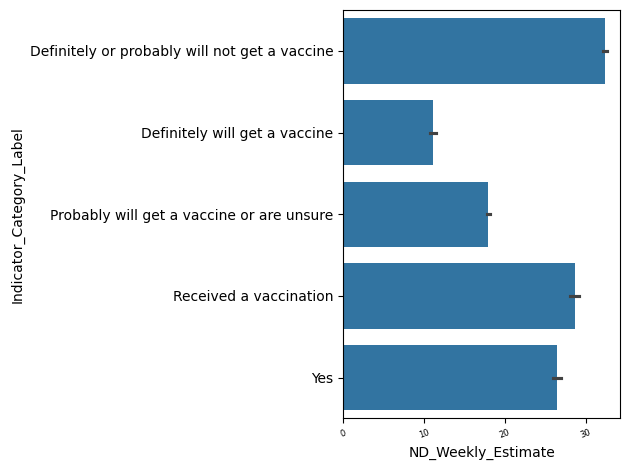

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.barplot(data=df, x='ND_Weekly_Estimate', y='Indicator_Category_Label', ax=ax)
plt.xticks(fontsize=6,rotation=20)
plt.tight_layout()
plt.show()

In [18]:
'''
df_indicator_label = pd.get_dummies(df['Indicator_Category_Label'], prefix='Indicator_Category_Label_')
df = df.join(df_indicator_label)
numeric_df = df.select_dtypes(include=['float64','int64','bool'])
corr_matrix = numeric_df.corr()
corrs_1 = corr_matrix['ND_Weekly_Estimate']
corrs_sorted_1 = corrs_1.sort_values(ascending=False)
print(corrs_sorted_1) 
'''

"\ndf_indicator_label = pd.get_dummies(df['Indicator_Category_Label'], prefix='Indicator_Category_Label_')\ndf = df.join(df_indicator_label)\nnumeric_df = df.select_dtypes(include=['float64','int64','bool'])\ncorr_matrix = numeric_df.corr()\ncorrs_1 = corr_matrix['ND_Weekly_Estimate']\ncorrs_sorted_1 = corrs_1.sort_values(ascending=False)\nprint(corrs_sorted_1) \n"

In [19]:
df['Demographic_Name'].unique()

array(['18+ years', '18-29 years', '18-49 years', '30-39 years',
       '40-49 years', '50-64 years', '60+ years', '65+ years',
       '65-74 years', '75+ years', 'No', 'Yes', 'Cisgender', 'Uninsured',
       'Above Poverty, Income < $75k', 'Above Poverty, Income >= $75k',
       'Below Poverty', 'Poverty Status Unknown',
       'American Indian/Alaska Native, Non-Hispanic',
       'Asian, Non-Hispanic', 'Black, Non-Hispanic', 'Hispanic',
       'Multiple or Other Races, Non-Hispanic', 'Other, Non-Hispanic',
       'Pacific Islander/Native Hawaiian, Non-Hispanic',
       'White, Non-Hispanic', 'Female', 'Male', "Don't Know/Refused",
       'Gay/Lesbian/Bisexual/Other', 'Straight', 'Rural (Non-MSA)',
       'Suburban (MSA Non-Principal City)', 'Urban (MSA Principal City)',
       'Transgender/Nonbinary', 'Insured', '6 months-4 years',
       '6-23 months', '>= College degree', 'High school or equivalent',
       'Less than high school', 'Overall', '12-17 years', '13-17 years',
       '5

In [20]:
df['Current_Season_Week_Ending'].unique()

array(['01/27/2024 12:00:00 AM', '02/03/2024 12:00:00 AM',
       '01/06/2024 12:00:00 AM', '01/13/2024 12:00:00 AM',
       '01/20/2024 12:00:00 AM', '11/18/2023 12:00:00 AM',
       '11/25/2023 12:00:00 AM', '12/02/2023 12:00:00 AM',
       '10/07/2023 12:00:00 AM', '10/14/2023 12:00:00 AM',
       '10/21/2023 12:00:00 AM', '10/28/2023 12:00:00 AM',
       '11/04/2023 12:00:00 AM', '11/11/2023 12:00:00 AM',
       '09/30/2023 12:00:00 AM', '12/16/2023 12:00:00 AM',
       '02/10/2024 12:00:00 AM', '12/09/2023 12:00:00 AM',
       '03/16/2024 12:00:00 AM', '04/13/2024 12:00:00 AM',
       '12/23/2023 12:00:00 AM', '12/30/2023 12:00:00 AM',
       '05/11/2024 12:00:00 AM', '06/15/2024 12:00:00 AM',
       '03/02/2024 12:00:00 AM', '02/17/2024 12:00:00 AM',
       '03/09/2024 12:00:00 AM', '02/24/2024 12:00:00 AM',
       '03/31/2024 12:00:00 AM', '05/04/2024 12:00:00 AM',
       '03/23/2024 12:00:00 AM', '04/20/2024 12:00:00 AM',
       '04/06/2024 12:00:00 AM', '04/27/2024 12:00:00 AM

In [21]:
df.shape

(21795, 24)

In [22]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                     0
Geographic_Name                      0
Demographic_Level                    0
Demographic_Name                     0
Indicator_Label                      0
Indicator_Category_Label             0
Month_Week                           0
Week_Ending                      17533
ND_Weekly_Estimate                 287
CI_Half_width_95pct                287
n_unweighted                        14
Suppression_Flag                     8
Current_Season_Week_Ending           0
Influenza_Season                     0
Legend                               0
95 CI (%)                           93
Indicator_Category_Label_Sort     8516
Demographic_Level_Sort               0
Demographic_Name_Sort                0
Geographic_Sort                      0
Season_Sort                          0
Legend_Sort                          0
n_weighted                       17533
geography_name_order             17533
dtype: int64


In [23]:
df.shape

(21795, 24)

In [24]:
df.dropna(subset=['95 CI (%)'], inplace=True)

In [25]:
print(np.sum(df['95 CI (%)'].isnull(), axis=0))

0


In [26]:
df.shape

(21702, 24)

In [27]:
n_mean = df['n_unweighted'].mean()
df['n_unweighted'].fillna(value=n_mean, inplace=True)

C:\Users\sabas\AppData\Local\Temp\ipykernel_33496\2153505924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['n_unweighted'].fillna(value=n_mean, inplace=True)


In [28]:
print(np.sum(df['n_unweighted'].isnull(), axis=0))

0


In [29]:
nd_mean = df['ND_Weekly_Estimate'].mean()
df['ND_Weekly_Estimate'].fillna(value=nd_mean, inplace=True)
print(np.sum(df['ND_Weekly_Estimate'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_33496\2882510942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ND_Weekly_Estimate'].fillna(value=nd_mean, inplace=True)


In [30]:
suppression_mean = df['Suppression_Flag'].mean()
df['Suppression_Flag'].fillna(value=suppression_mean, inplace=True)
print(np.sum(df['Suppression_Flag'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_33496\1402633656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Suppression_Flag'].fillna(value=suppression_mean, inplace=True)


In [31]:
ci_half_width_mean = df['CI_Half_width_95pct'].mean()
df['CI_Half_width_95pct'].fillna(value=ci_half_width_mean, inplace=True)
print(np.sum(df['CI_Half_width_95pct'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_33496\3775633255.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CI_Half_width_95pct'].fillna(value=ci_half_width_mean, inplace=True)


In [32]:
df['Indicator_Category_Label_Sort'].fillna(value=0, inplace=True)
print(np.sum(df['Indicator_Category_Label_Sort'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_33496\1300723985.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Indicator_Category_Label_Sort'].fillna(value=0, inplace=True)


In [33]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                     0
Geographic_Name                      0
Demographic_Level                    0
Demographic_Name                     0
Indicator_Label                      0
Indicator_Category_Label             0
Month_Week                           0
Week_Ending                      17440
ND_Weekly_Estimate                   0
CI_Half_width_95pct                  0
n_unweighted                         0
Suppression_Flag                     0
Current_Season_Week_Ending           0
Influenza_Season                     0
Legend                               0
95 CI (%)                            0
Indicator_Category_Label_Sort        0
Demographic_Level_Sort               0
Demographic_Name_Sort                0
Geographic_Sort                      0
Season_Sort                          0
Legend_Sort                          0
n_weighted                       17440
geography_name_order             17440
dtype: int64


In [34]:
df.head()

,Geographic_Level,Geographic_Name,Demographic_Level,Demographic_Name,Indicator_Label,Indicator_Category_Label,Month_Week,Week_Ending,ND_Weekly_Estimate,CI_Half_width_95pct,...,Legend,95 CI (%),Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
0,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,30.8,7.8784,...,"2023-2024, Arizona, Overall (18+ years)",22.9 - 38.7,4.0,1,1,14,3,3140101,NaN,NaN
1,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,6.8,4.1669,...,"2023-2024, Arizona, Overall (18+ years)",2.6 - 11.0,2.0,1,1,14,3,3140101,NaN,NaN
2,State,Arizona,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,22.3,7.6134,...,"2023-2024, Arizona, Overall (18+ years)",14.7 - 29.9,3.0,1,1,14,3,3140101,NaN,NaN
3,State,Arizona,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,1.0,1,1,14,3,3140101,NaN,NaN
4,State,Arizona,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,0.0,1,1,14,3,3140101,NaN,NaN


In [35]:
df = df.drop(columns=['Week_Ending','n_weighted','geography_name_order'])

In [36]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                 0
Geographic_Name                  0
Demographic_Level                0
Demographic_Name                 0
Indicator_Label                  0
Indicator_Category_Label         0
Month_Week                       0
ND_Weekly_Estimate               0
CI_Half_width_95pct              0
n_unweighted                     0
Suppression_Flag                 0
Current_Season_Week_Ending       0
Influenza_Season                 0
Legend                           0
95 CI (%)                        0
Indicator_Category_Label_Sort    0
Demographic_Level_Sort           0
Demographic_Name_Sort            0
Geographic_Sort                  0
Season_Sort                      0
Legend_Sort                      0
dtype: int64


In [37]:
df['Age_Group'] = df['Demographic_Name'].where(df['Demographic_Name'].str.contains('years'))
df.columns

Index(['Geographic_Level', 'Geographic_Name', 'Demographic_Level',
       'Demographic_Name', 'Indicator_Label', 'Indicator_Category_Label',
       'Month_Week', 'ND_Weekly_Estimate', 'CI_Half_width_95pct',
       'n_unweighted', 'Suppression_Flag', 'Current_Season_Week_Ending',
       'Influenza_Season', 'Legend', '95 CI (%)',
       'Indicator_Category_Label_Sort', 'Demographic_Level_Sort',
       'Demographic_Name_Sort', 'Geographic_Sort', 'Season_Sort',
       'Legend_Sort', 'Age_Group'],
      dtype='object')

In [38]:
df['Age_Group'].unique()

array(['18+ years', '18-29 years', '18-49 years', '30-39 years',
       '40-49 years', '50-64 years', '60+ years', '65+ years',
       '65-74 years', '75+ years', nan, '6 months-4 years', '12-17 years',
       '13-17 years', '5-11 years', '5-12 years', '5-17 years'],
      dtype=object)

In [39]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                    0
Geographic_Name                     0
Demographic_Level                   0
Demographic_Name                    0
Indicator_Label                     0
Indicator_Category_Label            0
Month_Week                          0
ND_Weekly_Estimate                  0
CI_Half_width_95pct                 0
n_unweighted                        0
Suppression_Flag                    0
Current_Season_Week_Ending          0
Influenza_Season                    0
Legend                              0
95 CI (%)                           0
Indicator_Category_Label_Sort       0
Demographic_Level_Sort              0
Demographic_Name_Sort               0
Geographic_Sort                     0
Season_Sort                         0
Legend_Sort                         0
Age_Group                        8529
dtype: int64


In [40]:
df['Age_Group'] = df['Age_Group'].fillna(0)
df['Age_Group'] = df['Age_Group'].replace({
    '6 months-4 years': 1,
    '5-11 years': 2,
    '5-12 years': 3,
    '5-17 years' : 4,
    '12-17 years' : 5,
    '13-17 years' : 6,
    '18+ years' : 7,
    '18-29 years' : 8,
    '18-49 years' : 9,
    '30-39 years' : 10,
    '40-49 years' : 11,
    '50-64 years' : 12,
    '60+ years' : 13,
    '65+ years' : 14,
    '65-74 years' : 15,
    '75+ years' : 16
})

C:\Users\sabas\AppData\Local\Temp\ipykernel_33496\1211279866.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age_Group'] = df['Age_Group'].replace({


In [41]:
df['Month_Week'].unique()

array(['January Week 4', 'February Week 1', 'January Week 1',
       'January Week 2', 'January Week 3', 'November Week 3',
       'November Week 4', 'December Week 1', 'October Week 2',
       'October Week 3', 'October Week 4', 'October Week 5',
       'November Week 1', 'November Week 2', 'October Week 1', 'October',
       'November', 'December', 'February', 'December Week 2', 'March',
       'April', 'January', 'December Week 3', 'December Week 4',
       'December Week 5', 'May', 'June', 'March Week 1',
       'February Week 2', 'February Week 3', 'March Week 2',
       'March Week 3', 'February Week 4', 'March Week 5', 'May Week 1',
       'May Week 2', 'March Week 4', 'April Week 2', 'April Week 3',
       'April Week 1', 'April Week 4'], dtype=object)

In [42]:
df['Month'] = df['Month_Week'].str.extract(r'([A-Za-z]+)')[0]
df['Month'] = df['Month'].str.strip()
df['Month'].unique()

array(['January', 'February', 'November', 'December', 'October', 'March',
       'April', 'May', 'June'], dtype=object)

In [43]:
df['Month'] = df['Month'].replace({
    'January' : 1,
    'February' : 2,
    'November' : 11,
    'December' : 12,
    'October' : 10,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6
})

C:\Users\sabas\AppData\Local\Temp\ipykernel_33496\683800597.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Month'] = df['Month'].replace({


In [44]:
df['Geographic_Name'].unique()

array(['Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'Illinois-City of Chicago', 'Illinois-Rest of State',
       'New York-New York City', 'New York-Rest of State',
       'Pennsylvania-Philadelphia County', 'Pennsylvania-Rest of State',
       'Texas-Bexar County', 'Texas-City of Houston',
       'Texas-Rest of State', 'National', '

In [45]:
df['Demographic_Level'].value_counts()

Demographic_Level
Overall                               14585
Age                                    1905
Race/Ethnicity                         1418
Poverty Status                          816
Urbanicity                              612
Sexual Orientation                      477
Gender Identity                         473
Disability Status                       318
Sex                                     318
Health Insurance                        318
Health Insurance Among 18-64 Years      282
Mother's Education                      180
Name: count, dtype: int64

In [46]:
df['Geographic_Level'].value_counts()

Geographic_Level
State       10667
National     7321
Region       2040
Substate     1674
Name: count, dtype: int64

In [47]:
df['Age_Group'].value_counts()

Age_Group
7     11313
0      8529
12      318
14      159
16      159
8       159
15      159
13      159
11      159
10      159
9       159
1        45
5        45
6        45
2        45
3        45
4        45
Name: count, dtype: int64

In [48]:
df['Demographic_Name'].value_counts()

Demographic_Name
18+ years                                         11313
Overall                                            3272
50-64 years                                         318
Don't Know/Refused                                  314
Uninsured                                           300
Insured                                             300
Hispanic                                            204
Above Poverty, Income < $75k                        204
White, Non-Hispanic                                 204
Black, Non-Hispanic                                 204
Poverty Status Unknown                              204
Below Poverty                                       204
Above Poverty, Income >= $75k                       204
Rural (Non-MSA)                                     204
Suburban (MSA Non-Principal City)                   204
Urban (MSA Principal City)                          204
Other, Non-Hispanic                                 186
Gay/Lesbian/Bisexual/Other     

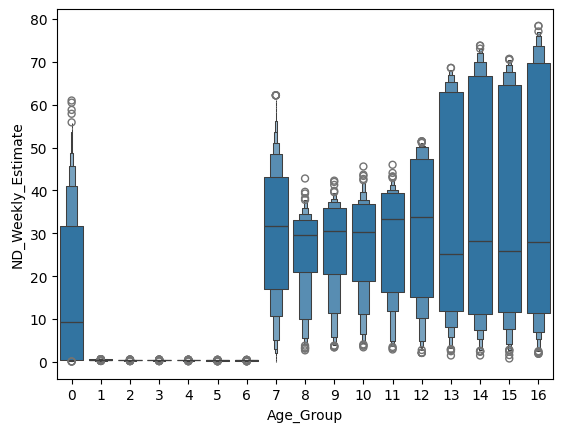

In [49]:
sns.boxenplot(data=df, x='Age_Group', y='ND_Weekly_Estimate')
plt.show()

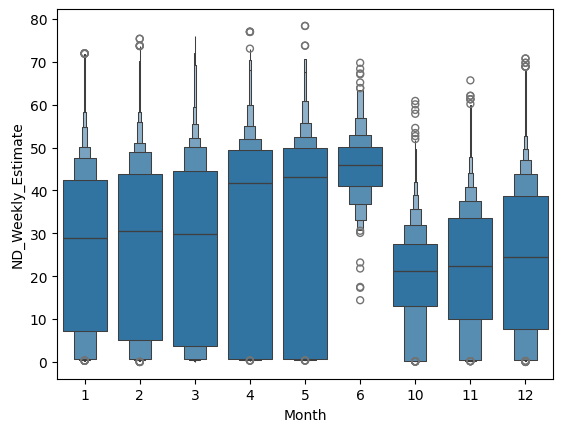

In [50]:
sns.boxenplot(data=df, x='Month', y='ND_Weekly_Estimate')
plt.show()

In [51]:
df_geographic_name = pd.get_dummies(df['Geographic_Name'], prefix='Geographic_Name_')
df = df.join(df_geographic_name)
df.drop(columns = 'Geographic_Name', inplace=True)

In [52]:
df_indicator_category_label = pd.get_dummies(df['Indicator_Category_Label'], prefix='Indicator_Category_Label_')
df = df.join(df_indicator_category_label)
df.drop(columns = 'Indicator_Category_Label', inplace=True)

In [53]:
df_demographic_name = pd.get_dummies(df['Demographic_Name'], prefix='Demographic_Name_')
df = df.join(df_demographic_name)
df.drop(columns = 'Demographic_Name', inplace=True)

In [54]:
df_influenza_season = pd.get_dummies(df['Influenza_Season'], prefix='Influenza_Season_')
df = df.join(df_influenza_season)
df.drop(columns = 'Influenza_Season', inplace=True)

In [55]:
feature_list = list(df.select_dtypes(include=['float64','boolean', 'int']).columns)
feature_list.remove('ND_Weekly_Estimate')
feature_list.remove('n_unweighted')
feature_list.remove('CI_Half_width_95pct')
feature_list.remove('Season_Sort')
feature_list.remove('Indicator_Category_Label_Sort')
feature_list.remove('Demographic_Name_Sort')
feature_list.remove('Geographic_Sort')
feature_list.remove('Legend_Sort')
feature_list.remove('Demographic_Name__Overall')
feature_list.remove('Demographic_Name__Yes')
feature_list.remove('Demographic_Level_Sort')
feature_list.remove('Suppression_Flag')
feature_list.remove('Indicator_Category_Label__Yes')

In [56]:
y = df['ND_Weekly_Estimate']
X = df[feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1234)


In [57]:
feature_list

['Age_Group',
 'Month',
 'Geographic_Name__Alabama',
 'Geographic_Name__Alaska',
 'Geographic_Name__Arizona',
 'Geographic_Name__Arkansas',
 'Geographic_Name__California',
 'Geographic_Name__Colorado',
 'Geographic_Name__Connecticut',
 'Geographic_Name__Delaware',
 'Geographic_Name__District of Columbia',
 'Geographic_Name__Florida',
 'Geographic_Name__Georgia',
 'Geographic_Name__Guam',
 'Geographic_Name__Hawaii',
 'Geographic_Name__Idaho',
 'Geographic_Name__Illinois',
 'Geographic_Name__Illinois-City of Chicago',
 'Geographic_Name__Illinois-Rest of State',
 'Geographic_Name__Indiana',
 'Geographic_Name__Iowa',
 'Geographic_Name__Kansas',
 'Geographic_Name__Kentucky',
 'Geographic_Name__Louisiana',
 'Geographic_Name__Maine',
 'Geographic_Name__Maryland',
 'Geographic_Name__Massachusetts',
 'Geographic_Name__Michigan',
 'Geographic_Name__Minnesota',
 'Geographic_Name__Mississippi',
 'Geographic_Name__Missouri',
 'Geographic_Name__Montana',
 'Geographic_Name__National',
 'Geographic_Na

In [58]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
predictions_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, predictions_dt)
r2_dt = r2_score(y_test, predictions_dt)
mse_dt = mean_squared_error(y_test, predictions_dt)
rmse_dt = root_mean_squared_error(y_test, predictions_dt)

In [59]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = root_mean_squared_error(y_test, predictions_rf)

In [60]:
print("Model Comparison:")
print(f"{'Metric':<15} {'Random Forest':<15} {'Decision Tree':<15}")
print(f"{'-'*45}")

print(f"{'MAE':<15} {mae_rf:<15.4f} {mae_dt:<15.4f}")
print(f"{'R² Score':<15} {r2_rf:<15.4f} {r2_dt:<15.4f}")
print(f"{'MSE':<15} {mse_rf:<15.4f} {mse_dt:<15.4f}")
print(f"{'RMSE':<15} {rmse_rf:<15.4f} {rmse_dt:<15.4f}")

Model Comparison:
Metric          Random Forest   Decision Tree  
---------------------------------------------
MAE             3.0499          3.0991         
R² Score        0.8790          0.8747         
MSE             39.1028         40.4916        
RMSE            6.2532          6.3633         


In [61]:
df_pred_test = pd.DataFrame()

In [62]:
df_pred_test['ND_Weekly_Estimate'] = y_test

In [63]:
df_pred_test['Predictions_DT'] = predictions_dt

In [64]:
df_pred_test['Predictions_RF'] = predictions_rf

In [65]:
df_pred_test.head()

,ND_Weekly_Estimate,Predictions_DT,Predictions_RF
12897,39.8,39.80,39.820333
14175,38.1,37.70,37.765667
11384,48.1,48.15,48.146514
4552,28.4,28.75,28.766434
16788,3.7,3.45,3.435726


In [66]:
forest_importances = rf_model.feature_importances_

C:\Users\sabas\AppData\Local\Temp\ipykernel_33496\1113225840.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


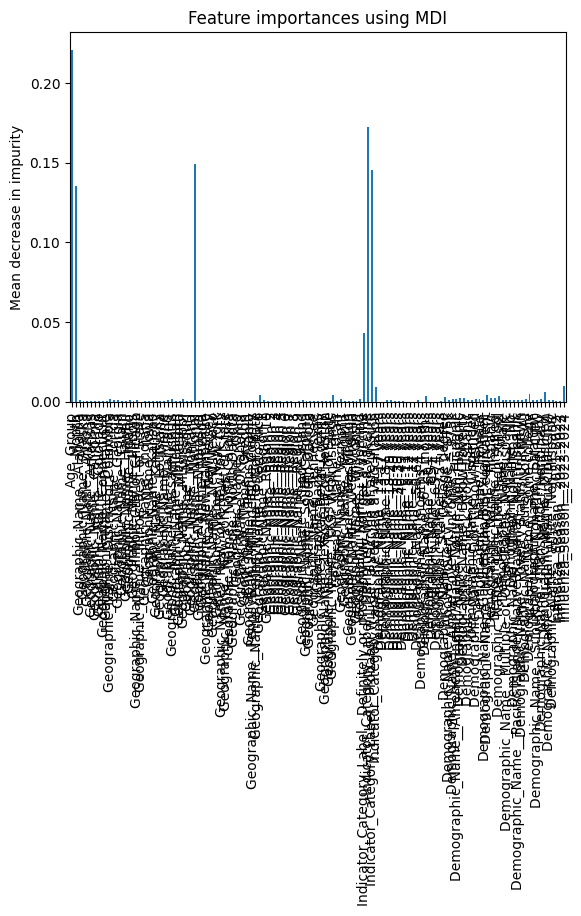

In [67]:
forest_importances_series = pd.Series(forest_importances, index=feature_list)
std = np.std([rf_model.feature_importances_ for tree in rf_model.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances_series.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [68]:
df_features_imp = pd.DataFrame()

In [69]:
df_features_imp['DT_importances'] = dt_model.feature_importances_

In [70]:
df_features_imp['RF_importances'] = rf_model.feature_importances_

In [71]:
df_features_imp['Feature_list'] = feature_list

In [72]:
df_features_imp.head()

,DT_importances,RF_importances,Feature_list
0,0.224231,0.220853,Age_Group
1,0.134953,0.135438,Month
2,0.000819,0.000847,Geographic_Name__Alabama
3,0.000653,0.000790,Geographic_Name__Alaska
4,0.000415,0.000447,Geographic_Name__Arizona


In [73]:
df_features_imp.sort_values(by="RF_importances", ascending=False)

,DT_importances,RF_importances,Feature_list
0,2.242309e-01,2.208526e-01,Age_Group
77,1.768284e-01,1.723855e-01,Indicator_Category_Label__Definitely will get ...
32,1.508106e-01,1.489213e-01,Geographic_Name__National
78,1.487324e-01,1.451907e-01,Indicator_Category_Label__Probably will get a ...
1,1.349529e-01,1.354379e-01,Month
...,...,...,...
89,0.000000e+00,1.486121e-09,Demographic_Name__5-17 years
81,2.453671e-12,4.865510e-10,Demographic_Name__13-17 years
80,2.607660e-10,3.178980e-10,Demographic_Name__12-17 years
87,7.357260e-11,2.519753e-10,Demographic_Name__5-11 years


In [74]:
df_features_imp.sort_values(by="DT_importances", ascending=False)

,DT_importances,RF_importances,Feature_list
0,2.242309e-01,2.208526e-01,Age_Group
77,1.768284e-01,1.723855e-01,Indicator_Category_Label__Definitely will get ...
32,1.508106e-01,1.489213e-01,Geographic_Name__National
78,1.487324e-01,1.451907e-01,Indicator_Category_Label__Probably will get a ...
1,1.349529e-01,1.354379e-01,Month
...,...,...,...
88,1.601226e-10,2.426863e-10,Demographic_Name__5-12 years
87,7.357260e-11,2.519753e-10,Demographic_Name__5-11 years
81,2.453671e-12,4.865510e-10,Demographic_Name__13-17 years
91,6.900949e-13,9.598086e-09,Demographic_Name__6 months-4 years


In [75]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
predictions_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)
mse_lr = mean_squared_error(y_test, predictions_lr)
rmse_lr = root_mean_squared_error(y_test, predictions_lr)

In [76]:
print("Model Comparison:")
print(f"{'Metric':<15} {'Random Forest':<15} {'Decision Tree':<15} {'Linear Regression':<15}")
print(f"{'-'*60}")

print(f"{'MAE':<15} {mae_rf:<15.4f} {mae_dt:<15.4f} {mae_lr:<15.4f}")
print(f"{'R² Score':<15} {r2_rf:<15.4f} {r2_dt:<15.4f} {r2_lr:<15.4f}")
print(f"{'MSE':<15} {mse_rf:<15.4f} {mse_dt:<15.4f} {mse_lr:<15.4f}")
print(f"{'RMSE':<15} {rmse_rf:<15.4f} {rmse_dt:<15.4f} {rmse_lr:<15.4f}")

Model Comparison:
Metric          Random Forest   Decision Tree   Linear Regression
------------------------------------------------------------
MAE             3.0499          3.0991          7.8499         
R² Score        0.8790          0.8747          0.6558         
MSE             39.1028         40.4916         111.2272       
RMSE            6.2532          6.3633          10.5464        


In [77]:
en_model = ElasticNet()
en_model.fit(X_train, y_train)
predictions_en = en_model.predict(X_test)
mae_en = mean_absolute_error(y_test, predictions_en)
r2_en = r2_score(y_test, predictions_en)
mse_en = mean_squared_error(y_test, predictions_en)
rmse_en = np.sqrt(mse_en)

In [78]:
print("Model Comparison:")
print(f"{'Metric':<15} {'Random Forest':<15} {'Decision Tree':<15} {'Linear Regression':<15} {'Elastic Net':<15}")
print(f"{'-'*75}")

print(f"{'MAE':<15} {mae_rf:<15.4f} {mae_dt:<15.4f} {mae_lr:<15.4f} {mae_en:<15.4f}")
print(f"{'R² Score':<15} {r2_rf:<15.4f} {r2_dt:<15.4f} {r2_lr:<15.4f} {r2_en:<15.4f}")
print(f"{'MSE':<15} {mse_rf:<15.4f} {mse_dt:<15.4f} {mse_lr:<15.4f} {mse_en:<15.4f}")
print(f"{'RMSE':<15} {rmse_rf:<15.4f} {rmse_dt:<15.4f} {rmse_lr:<15.4f} {rmse_en:<15.4f}")

Model Comparison:
Metric          Random Forest   Decision Tree   Linear Regression Elastic Net    
---------------------------------------------------------------------------
MAE             3.0499          3.0991          7.8499          13.7854        
R² Score        0.8790          0.8747          0.6558          0.2310         
MSE             39.1028         40.4916         111.2272        248.4803       
RMSE            6.2532          6.3633          10.5464         15.7633        


In [79]:
df_pred_test['Predictions_LR'] = predictions_lr
df_pred_test['Predictions_EN'] = predictions_en

In [80]:
df_pred_test.head(10)

,ND_Weekly_Estimate,Predictions_DT,Predictions_RF,Predictions_LR,Predictions_EN
12897,39.800,39.800,39.820333,39.875000,31.515901
14175,38.100,37.700,37.765667,37.312500,38.108519
11384,48.100,48.150,48.146514,37.414062,30.220792
4552,28.400,28.750,28.766434,36.414062,16.426923
16788,3.700,3.450,3.435726,12.843750,27.715111
2666,24.700,22.900,21.848607,8.062500,15.041673
15120,52.100,52.100,51.981667,38.273438,29.248321
12383,41.000,41.225,41.206357,36.531250,19.507934
10964,49.300,49.300,49.304000,39.453125,30.220792
18207,0.356,0.356,1.788321,2.218750,14.250730


In [81]:
lr_coef = lr_model.coef_
importance_df_lr = pd.DataFrame({'Feature': feature_list, 'Coefficient': lr_coef})
importance_df_lr['Absolute Coefficient'] = importance_df_lr['Coefficient'].abs()
importance_df = importance_df_lr.sort_values(by='Absolute Coefficient', ascending=False)
importance_df

,Feature,Coefficient,Absolute Coefficient
128,Influenza_Season__2023-2024,-4.464224e+13,4.464224e+13
126,Influenza_Season__2021-2022,-4.464224e+13,4.464224e+13
127,Influenza_Season__2022-2023,-4.464224e+13,4.464224e+13
96,Demographic_Name__75+ years,1.938736e+13,1.938736e+13
95,Demographic_Name__65-74 years,1.817565e+13,1.817565e+13
...,...,...,...
102,Demographic_Name__Below Poverty,7.655334e+00,7.655334e+00
109,Demographic_Name__Hispanic,7.622040e+00,7.622040e+00
76,Indicator_Category_Label__Definitely or probab...,-3.680420e+00,3.680420e+00
79,Indicator_Category_Label__Received a vaccination,1.783844e+00,1.783844e+00


In [82]:
en_coef = en_model.coef_
importance_df_en = pd.DataFrame({'Feature': feature_list, 'Coefficient': en_coef})
importance_df_en['Absolute Coefficient'] = importance_df_en['Coefficient'].abs()
importance_df_en = importance_df_en.sort_values(by='Absolute Coefficient', ascending=False)
importance_df_en

,Feature,Coefficient,Absolute Coefficient
77,Indicator_Category_Label__Definitely will get ...,-2.505681,2.505681
0,Age_Group,1.602556,1.602556
32,Geographic_Name__National,1.367320,1.367320
128,Influenza_Season__2023-2024,-1.225467,1.225467
78,Indicator_Category_Label__Probably will get a ...,-1.062613,1.062613
...,...,...,...
40,Geographic_Name__New York-Rest of State,-0.000000,0.000000
39,Geographic_Name__New York-New York City,-0.000000,0.000000
38,Geographic_Name__New York,-0.000000,0.000000
37,Geographic_Name__New Mexico,-0.000000,0.000000


In [83]:
df_features_imp['LR_importances'] = importance_df_lr['Coefficient']
df_features_imp['EN_importances'] = importance_df_en['Coefficient']

In [84]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_features_imp['Feature_list'],
    y=df_features_imp['LR_importances'],
    mode='markers',
    name='Linear Regression',
    marker=dict(color='red', symbol='circle'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=df_features_imp['Feature_list'],
    y=df_features_imp['EN_importances'],
    mode='markers',
    name='Elastic Net',
    marker=dict(color='blue', symbol='x'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=df_features_imp['Feature_list'],
    y=df_features_imp['RF_importances'],
    mode='markers',
    name='Random Forest',
    marker=dict(color='green', symbol='square'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=df_features_imp['Feature_list'],
    y=df_features_imp['DT_importances'],
    mode='markers',
    name='Decision Tree',
    marker=dict(color='orange', symbol='diamond'),
    showlegend=True
))

fig.update_layout(
    title='Feature Importances Comparison: LR, EN, RF, and DT',
    xaxis_title='Features',
    yaxis_title='Importance',
    xaxis_tickangle=-45,
    legend_title_text='Models',
    template='plotly_white'
)

fig.show()

In [85]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test,
    y=predictions_lr,
    mode='markers',
    name='Linear Regression Predictions',
    marker=dict(color='red', symbol='x')
))

fig.add_trace(go.Scatter(
    x=y_test,
    y=predictions_dt,
    mode='markers',
    name='Decision Tree Predictions',
    marker=dict(color='green', symbol='circle')
))

fig.add_trace(go.Scatter(
    x=y_test,
    y=predictions_rf,
    mode='markers',
    name='Random Forest Predictions',
    marker=dict(color='orange', symbol='square')
))

fig.add_trace(go.Scatter(
    x=y_test,
    y=predictions_en,
    mode='markers',
    name='Elastic Net Predictions',
    marker=dict(color='purple', symbol='diamond')
))

max_value = max(y_test.max(), predictions_lr.max(), predictions_dt.max(), predictions_rf.max(), predictions_en.max())
min_value = min(y_test.min(), predictions_lr.min(), predictions_dt.min(), predictions_rf.min(), predictions_en.min())

fig.add_trace(go.Scatter(
    x=[min_value, max_value],
    y=[min_value, max_value],
    mode='lines',
    name='Perfect Prediction Line',
    line=dict(color='black', dash='dash')
))

fig.update_layout(
    xaxis_title='Actual Values (y_test)',
    yaxis_title='Predicted Values',
    title='Model Predictions Comparison',
    legend_title_text='Models',
    template='plotly_white'
)

fig.show()